In [1]:
import cv2
import os 
import PIL
import pathlib
import numpy as np

In [2]:
data_dir = r"D:\HP\Documents\data\seperate_ricepests5"
data_dir

'D:\\HP\\Documents\\data\\seperate_ricepests5'

In [3]:
data_dirr = pathlib.Path(data_dir)
data_dirr

WindowsPath('D:/HP/Documents/data/seperate_ricepests5')

In [4]:
cato = [
    "Adult Rice Leaf Roller",
    "Adult Rice water Weevil",
    "Adult Rice Yellow Stem Borer",
    "Adult White backed plant hopper"
]
data = []

In [5]:
for catogry in cato:
    path = os.path.join(data_dir,catogry)
    label = cato.index(catogry)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        p_img = cv2.imread(imgpath,0)
        try:
            p_img = cv2.resize(p_img,(50,50))
            image = np.array(p_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass

In [6]:
len(data)

617

In [10]:
np.shape(data)

D:\jupy\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(617, 2)

In [7]:
import pickle
pick_in = open("img.pickle","wb")
pickle.dump(data,pick_in)
pick_in.close()

In [8]:
pick = open("img.pickle","rb" )
img_ins = pickle.load(pick)
pick.close()

In [9]:
import random
random.shuffle(img_ins)
features = []
label = []
for f, l in img_ins:
    features.append(f)
    label.append(l)

In [10]:
np.shape(label)

(617,)

In [11]:
#apply median blur
b =  len(features)
median_X = []
for i in range(0,b):
    median_X.append(cv2.medianBlur(features[i],3))
    


In [12]:
len(median_X)

617

In [30]:
#apply water shed segmentation

import cv2 as cv
from matplotlib import pyplot as plt
alen = len(median_X)
wtr_shd = []
for i in range(0, alen):
    gray = cv.cvtColor(median_X,cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv.dilate(opening,kernel,iterations=3)
    # Finding sure foreground area
    dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
    ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv.subtract(sure_bg,sure_fg)


    # Marker labelling
    ret, markers = cv.connectedComponents(sure_fg)
    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1
    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0



    markers = cv.watershed(img,markers)
    im = img[markers == -1] = [255,0,0]
    wtr_shd.append(im)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [11]:
len(wtr_shd)

617

In [160]:
wt = np.array(wtr_shd)
wy = np.array(y)
print(wt.size)
print(wy.size)

1851
617


In [174]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
   
      
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
path = 'GFG.png'
img_bgr = img
lbp_img = []   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
        lbp_img.append(img_lbp[i, j])
   
# plt.imshow(img_lbp, cmap ="gray")
# plt.show()
   
print("LBP Program is finished")

AttributeError: 'str' object has no attribute 'shape'

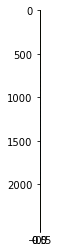

In [33]:
plt.imshow(median_X[0])
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size =0.1)


In [17]:
from sklearn.svm import SVC
svm_model =  SVC(C=1,kernel="poly",gamma='auto')
svm_model.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [24]:
pick=open("model.pkl","wb")
pickle.dump(svm_model,pick)
pick.close()

In [25]:
pick=open("model.pkl","rb")
model = pickle.load(pick)
pick.close()

In [61]:
cato = [
    "Adult Rice Leaf Roller",
    "Adult Rice water Weevil",
    "Adult Rice Yellow Stem Borer",
    "Adult White backed plant hopper"
]


In [18]:
prediction = svm_model.predict(X_test)
accuracy = svm_model.score(X_test,y_test)

In [20]:
accuracy

0.6935483870967742

In [22]:
cato[prediction[0]]

'Adult Rice Leaf Roller'

1


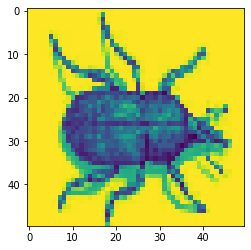

In [23]:
import matplotlib.pyplot as plt 
my = X_test[2].reshape(50,50)
print(y_test[2])
plt.imshow(my)
plt.show()

In [1]:
pick=open("model.sav","rb")
model = pickle.load(pick)
pick.close()

NameError: name 'pickle' is not defined